### model summary

In [1]:
import json
import model
from summary import model_summary

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### load test data

In [3]:
data_test_df = pd.read_parquet("./output/data_test_df.parquet")

### recreate model

In [4]:
# load training_config.json into dictionary
with open("./output/marketing_model.json") as file:
    # Load its content and make a new dictionary
    training_config = json.load(file)

In [5]:
training_config

{'numeric_features': ['age', 'years_in_sf', 'household_members', 'under_18'],
 'categorical_features': ['sex',
  'marital_status',
  'education',
  'occupation',
  'dual_income',
  'household_status',
  'type_of_home',
  'ethnic_class',
  'language'],
 'target': 'target',
 'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 1,
 'booster': 'gbtree',
 'objective': 'binary:logistic',
 'random_state': 40,
 'scale_pos_weight': 1}

In [6]:
# create model with training config
pipe_final_new = model.ClassificationModel(training_config)

In [7]:
# load trained model
pipe_final_new.load_model("./output/marketing_model")

2025-04-08 16:50:33.975 | INFO     | model:load_model:213 - Loaded sklearn pipeline from ./output/marketing_model.


### predict on test data

In [8]:
pipe_final_new.evaluate(data_test_df)

2025-04-08 16:50:34.029 | INFO     | model:evaluate:202 - Computed metrics...


(array([[0.79461336, 0.20538665],
        [0.04711682, 0.9528832 ],
        [0.5268866 , 0.4731134 ],
        ...,
        [0.9951179 , 0.00488207],
        [0.03733277, 0.9626672 ],
        [0.3098601 , 0.6901399 ]], dtype=float32),
 {'f1_score': 0.8098840141200202,
  'roc_auc': 0.8672534991447229,
  'precision': 0.8086606243705942,
  'recall': 0.8111111111111111,
  'balanced_acc': 0.7881266309572861,
  'accuracy': 0.7904391328515842})

### create dataframe with predictions

In [9]:
predictions_df = pipe_final_new.predict(data_test_df)

2025-04-08 16:50:34.066 | INFO     | model:predict:155 - Computed predictions for 1799 records


In [10]:
predictions_df

,sex,marital_status,education,occupation,dual_income,household_status,type_of_home,ethnic_class,language,age,years_in_sf,household_members,under_18,target,prediction_probability,prediction,prediction_datetime
0,1,5.0,5.0,6.0,1,2.0,5.0,7.0,1.0,2.0,4.0,3.0,0.0,1,0.205387,0,2025-04-08 16:50:34.069381
1,2,1.0,3.0,4.0,2,2.0,1.0,7.0,1.0,6.0,5.0,3.0,1.0,1,0.952883,1,2025-04-08 16:50:34.069381
2,2,5.0,5.0,1.0,1,2.0,3.0,7.0,1.0,2.0,5.0,1.0,0.0,0,0.473113,0,2025-04-08 16:50:34.069381
3,2,1.0,3.0,1.0,2,1.0,5.0,7.0,1.0,4.0,5.0,4.0,1.0,1,0.985294,1,2025-04-08 16:50:34.069381
4,2,5.0,5.0,1.0,1,3.0,1.0,7.0,1.0,3.0,5.0,3.0,0.0,1,0.608380,1,2025-04-08 16:50:34.069381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,1,3.0,3.0,4.0,1,nan,1.0,5.0,1.0,3.0,5.0,3.0,1.0,0,0.726072,1,2025-04-08 16:50:34.069381
1795,2,1.0,5.0,5.0,3,1.0,1.0,7.0,1.0,3.0,3.0,3.0,1.0,1,0.937626,1,2025-04-08 16:50:34.069381
1796,2,5.0,2.0,6.0,1,3.0,3.0,7.0,nan,1.0,4.0,2.0,1.0,0,0.004882,0,2025-04-08 16:50:34.069381
1797,2,1.0,5.0,1.0,2,1.0,1.0,8.0,1.0,5.0,5.0,3.0,0.0,1,0.962667,1,2025-04-08 16:50:34.069381


### model summary (with test data)

In [11]:
# tranform test data
transformed_data_test = pipe_final_new.transform(data_test_df)

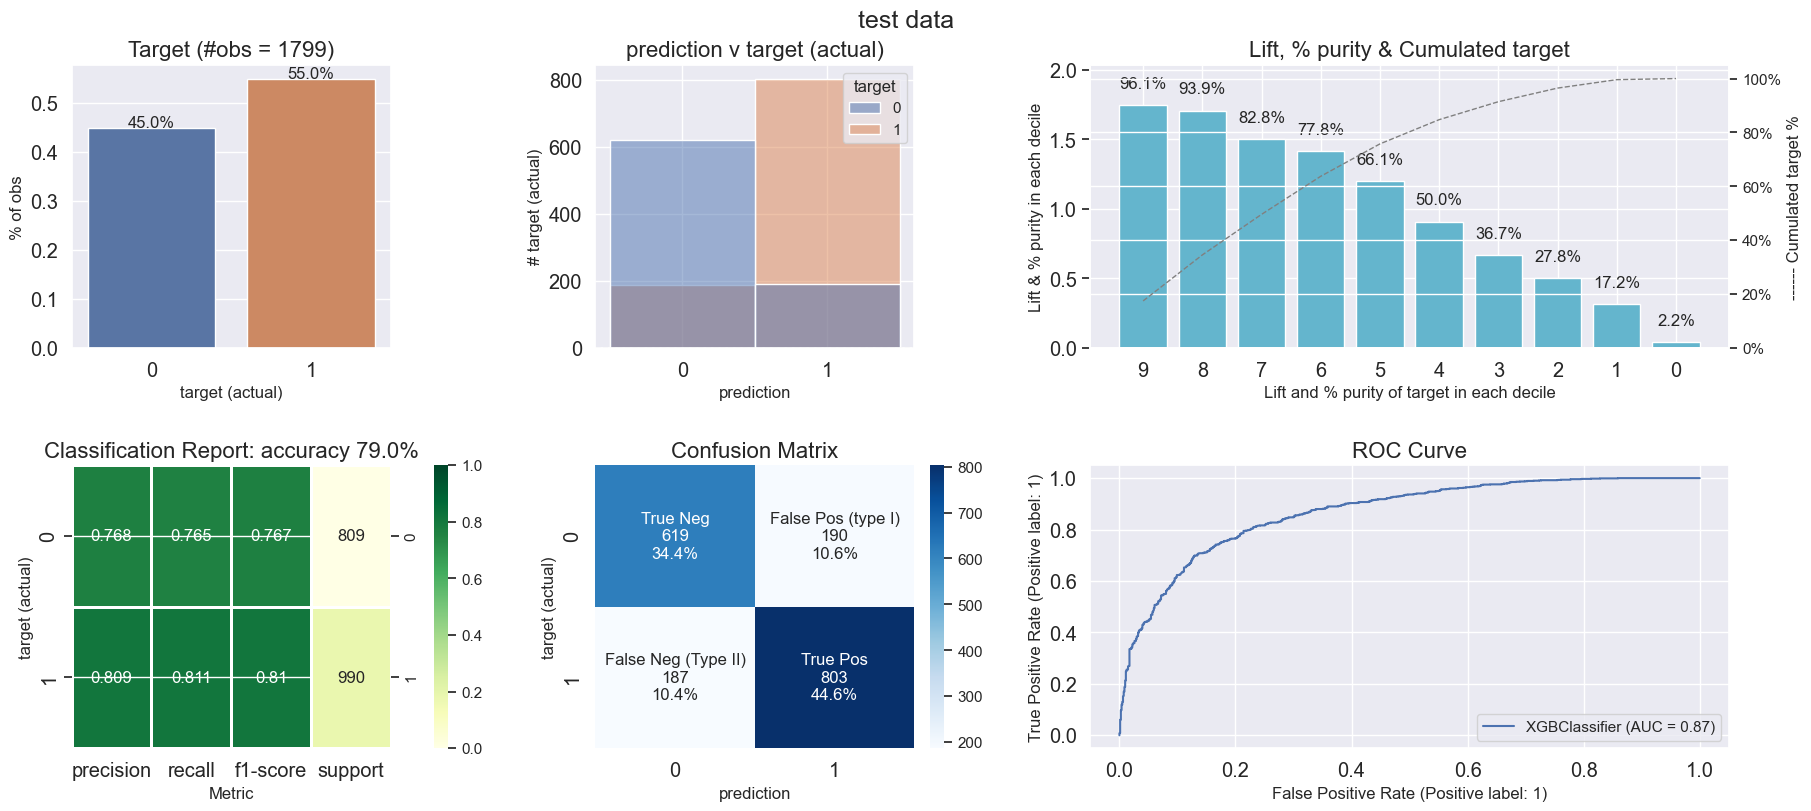

In [12]:
# create model report using transformed test data
model_summary(model=pipe_final_new.model_instance['classifier'], X_test_df=transformed_data_test, y_test=data_test_df.target, dataset_name="test")